# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기
---
- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
- 여기에서 데이터를 상세히 확인할 수 있습니다.

In [70]:
# 데이터 불러오기
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
---
- to_datetime 활용 : 링크 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [71]:
# datetime 자료형 변경
train['datetime'] = pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [72]:
# 6개의 속성 추가
time_attrs = ['year', 'month', 'day', 'hour', 'minute', 'second']

for i in time_attrs:
    train[i] = getattr(train['datetime'].dt, i)
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
---
- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

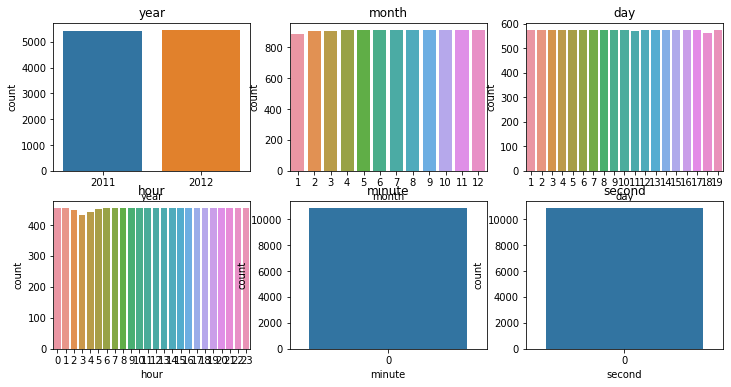

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2,3,i+1)
    sns.countplot(x=time_attrs[i], data=train)
    plt.title(time_attrs[i])

## (4) X, y 컬럼 선택 및 train/test 데이터 분리
---
- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [74]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [75]:
# 계절 기준 확인
# 봄 : 1~3월
# 여름 : 4~6월
# 가을 : 7~9월
# 겨울 : 10~12월
print(train[train['season'] == 1].month.unique())
print(train[train['season'] == 2].month.unique())
print(train[train['season'] == 3].month.unique())
print(train[train['season'] == 4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


<AxesSubplot:xlabel='hour', ylabel='count'>

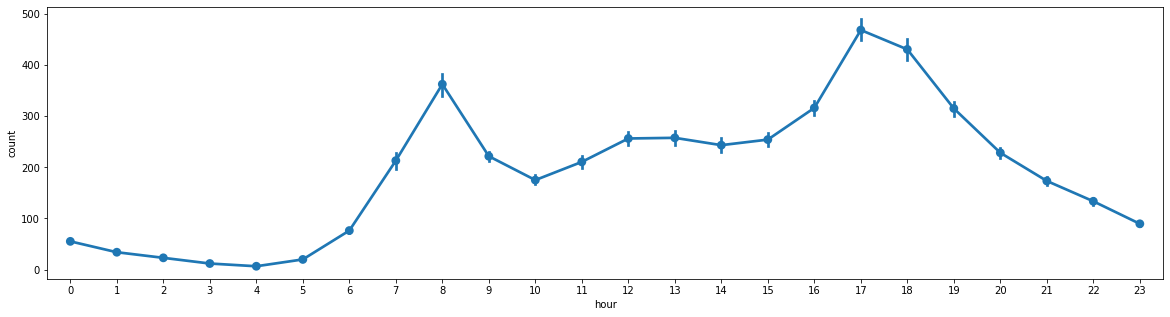

In [76]:
# 시간에 따른 수
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)

<AxesSubplot:xlabel='hour', ylabel='count'>

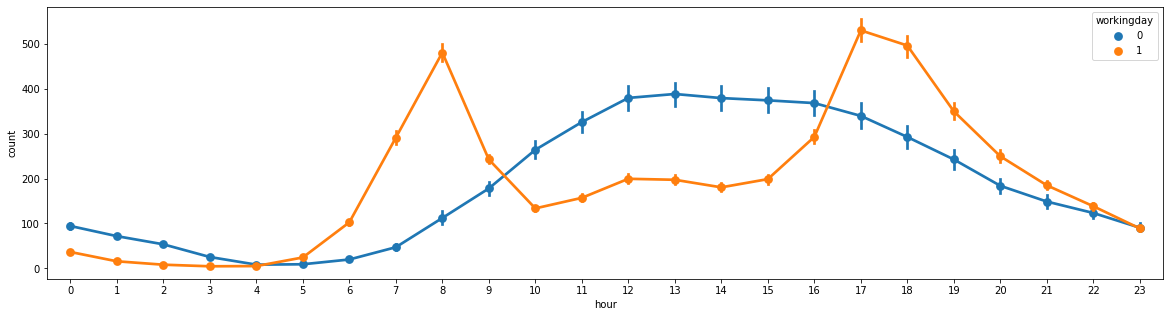

In [18]:
# 시간과 근무일에 따른 수
# 근무일에는 출퇴근 시간대에 사용이 많음
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax1)

<AxesSubplot:xlabel='hour', ylabel='count'>

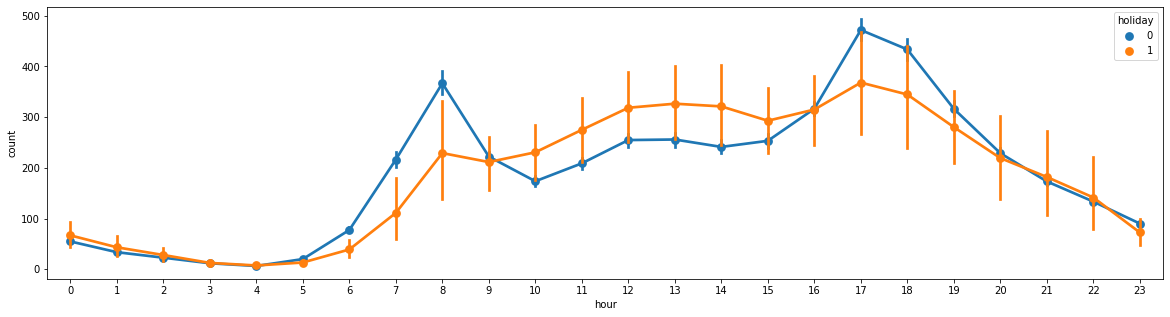

In [20]:
# 시간과 휴일에 따른 수
# 휴일에는 시간대별로 낮에는 고르게 사용
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday', ax = ax1)

<AxesSubplot:xlabel='hour', ylabel='count'>

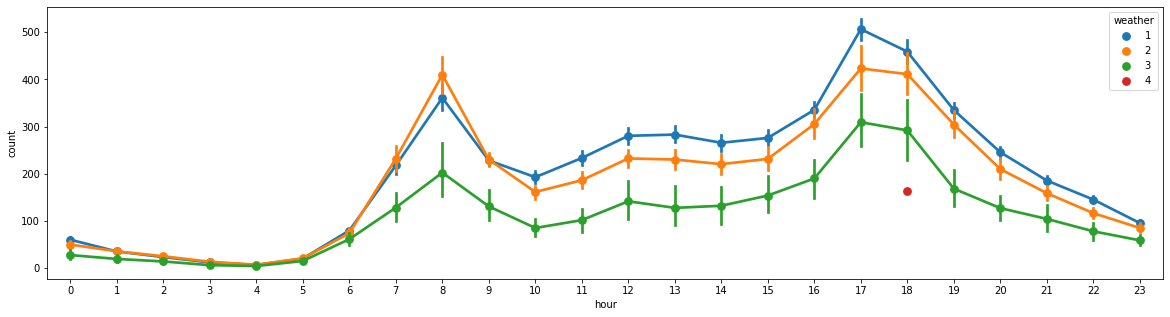

In [19]:
# 시간별 날씨에 따른 수
# 겨울에는 추위로 인해 거의 사용 없음
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax1)

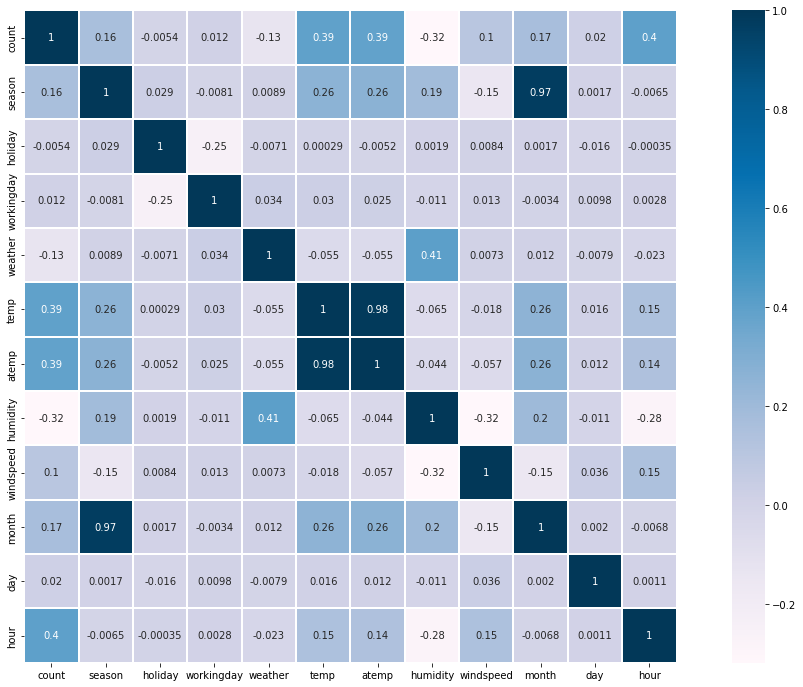

In [21]:
# temp와 atemp는 거의 동일한 상관관계를 보임
corr_data = train[['count', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'day', 'hour']]
fig, ax = plt.subplots(figsize=(20,12))
colormap = plt.cm.PuBu

sns.heatmap(data = corr_data.corr(), ax = ax, linewidths = 0.1, square = True, annot = True, cmap = colormap)

plt.show()

<AxesSubplot:xlabel='humidity', ylabel='count'>

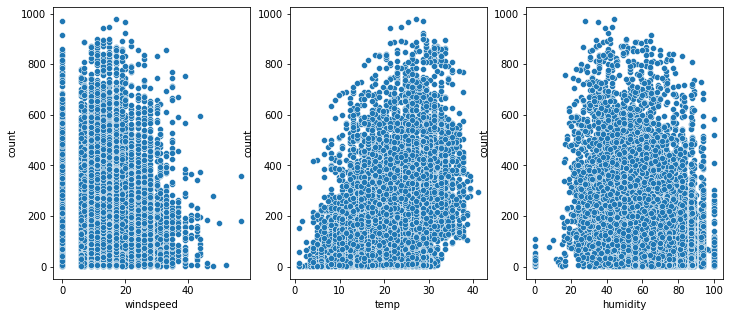

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(12,5))

sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = ax1)
sns.scatterplot(data = train, x = 'temp', y = 'count', ax = ax2)
sns.scatterplot(data = train, x = 'humidity', y =  'count', ax = ax3)

<AxesSubplot:xlabel='count'>

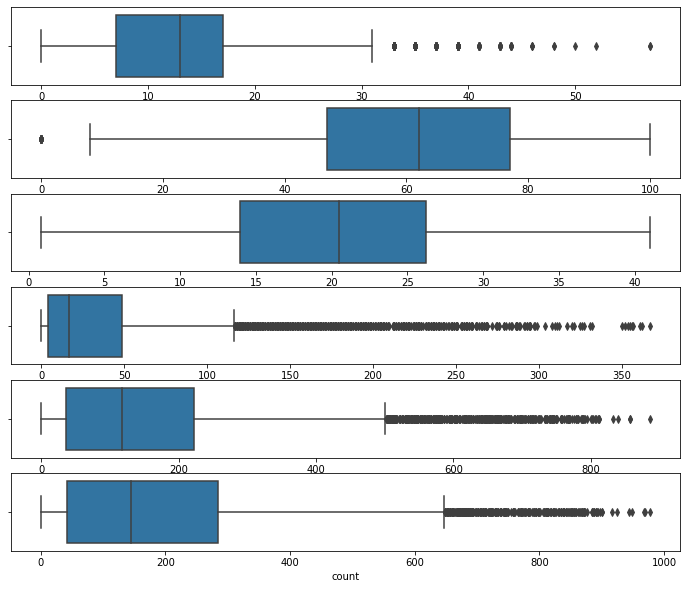

In [45]:
# 풍속이 0인 데이터를 IQR을 활용해 예측치로 바꿔줍니다.

len(train[train['windspeed']==0])

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (12,10))
sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)
sns.boxplot(data = train, x = 'temp', ax = ax3)
sns.boxplot(data = train, x = 'casual', ax = ax4)
sns.boxplot(data = train, x = 'registered', ax = ax5)
sns.boxplot(data = train, x = 'count', ax = ax6)

In [46]:
# IQR method
import numpy as np
from collections import Counter

def detect_outliers(data, n, cols):
    outlier_indices = []
    for col in cols:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

Outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])


In [47]:
train.shape

(10886, 18)

In [48]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)
train.shape

(10846, 18)

Skewness (왜도): 1.210923
Kurtosis (첨도): 1.200871


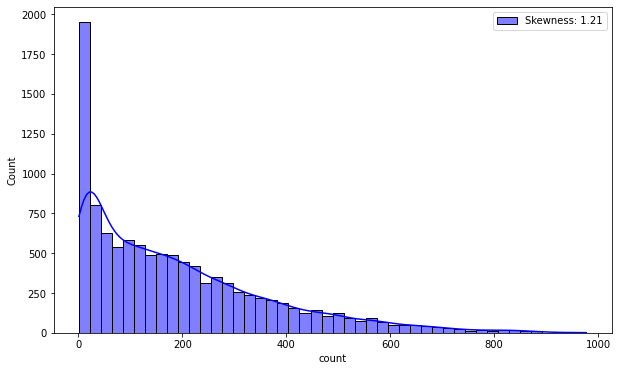

In [49]:
# 왜도, 첨도 확인
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

graph = sns.histplot(train['count'],
                     color='b',
                     kde=True,
                     label='Skewness: {:.2f}'.format(train['count'].skew()),
                     ax=ax)

graph.legend(loc='best')

print('Skewness (왜도): %f' % train['count'].skew())
print('Kurtosis (첨도): %f' % train['count'].kurt())

Skewness (왜도): -0.975198
Kurtosis (첨도): 0.247435


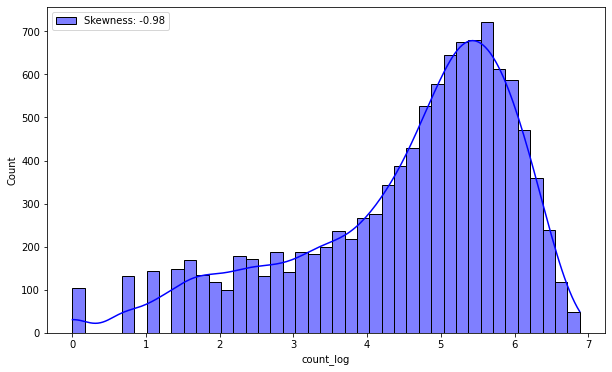

In [50]:
# 람다를 통해 'count_log' 생성

train['count_log'] = train['count'].map(lambda i: np.log(i) if i > 0 else 0)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
graph = sns.histplot(train['count_log'], color='b', label='Skewness: {:.2f}'.format(train['count_log'].skew()), kde=True)
graph.legend(loc='best')

print("Skewness (왜도): %f" % train['count_log'].skew())
print("Kurtosis (첨도): %f" % train['count_log'].kurt())

# drop 'count'
train.drop('count', axis=1, inplace=True)

In [51]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    wind0 = data.loc[data['windspeed'] == 0]
    windnot0 = data.loc[data['windspeed'] != 0]

    # Predict 'windspeed' using weather variables
    col = ['season', 'weather', 'temp', 'humidity', 'atemp', 'day']

    windnot0['windspeed'] = windnot0['windspeed'].astype('str')

    rf = RandomForestClassifier()
    # Fit 'windspeed!=0'
    # model.fit(X_train, Y_train)
    rf.fit(windnot0[col], windnot0['windspeed'])

    # Predict where 'windspeed!=0'
    # model.predict(X_test)
    pred_wind0 = rf.predict(X=wind0[col])

    # Change value of 'wind0' to 'pred_wind0'
    wind0['windspeed'] = pred_wind0

    # Combine 'windnot0' & 'wind0'
    data = windnot0.append(wind0)
    data['windspeed'] = data['windspeed'].astype('float')

    data.reset_index(inplace=True, drop=True)

    return data


In [52]:
# 예측 풍속 추가
train = predict_windspeed(train)

/tmp/ipykernel_367/652264675.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windnot0['windspeed'] = windnot0['windspeed'].astype('str')
/tmp/ipykernel_367/652264675.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind0['windspeed'] = pred_wind0


In [53]:
train[train['windspeed'] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,count_log


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('count', axis=1), train['count'], test_size=0.2)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

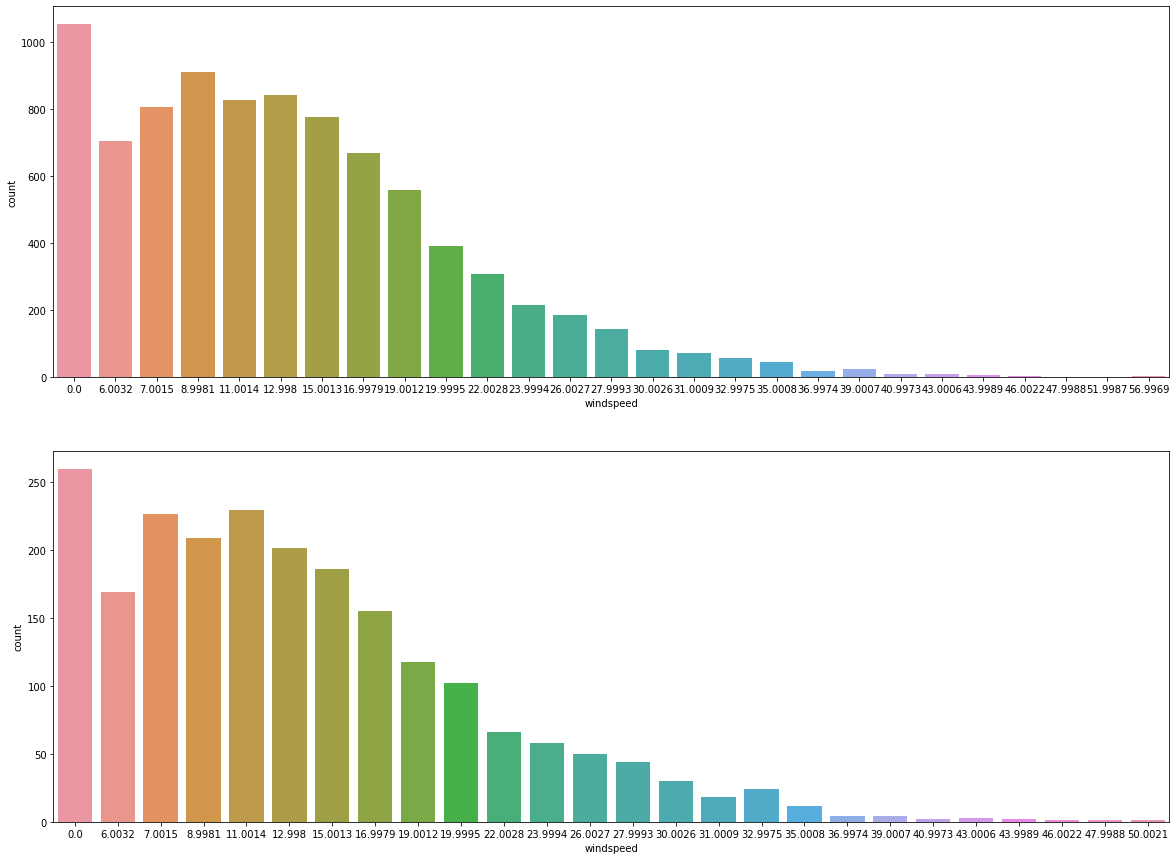

In [79]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,15)

sns.countplot(data = X_train, x = 'windspeed', ax = ax1)
sns.countplot(data = X_test, x = 'windspeed', ax = ax2)

- <b> test data에 대한 시각화는 진행하지 않는 것이 좋습니다 (정보 유출 관련 내용과 관련이 있습니다.</b>

In [ ]:
### 여기에 test data에서 weather 4를 3으로 처리해주는 전처리를 추가하거나
### train data에 weather 4 피처를 추가해주신다면 잘 돌아갈 것 같습니다

In [80]:
# One-hot encoding

X_train = pd.get_dummies(X_train, columns = ['weather'], prefix = 'weather')
X_test = pd.get_dummies(X_test, columns = ['weather'], prefix = 'weather')

X_train = pd.get_dummies(X_train, columns = ['season'], prefix = 'season')
X_test = pd.get_dummies(X_test, columns = ['season'], prefix = 'season')

In [94]:
X_train.drop('datetime', axis = 1, inplace=True)
X_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'weather_1', 'weather_2', 'weather_3', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [95]:
X_test.drop('datetime', axis = 1, inplace=True)
X_test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4'],
      dtype='object')

## (5) LinearRegression 모델 학습
---
- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [104]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
---
- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [109]:
y_pred = lr_model.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- weather_4
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 22 features, but LinearRegression is expecting 21 features as input.

In [98]:
mse = ((y_pred - y_test) ** 2).mean()
rmse = np.sqrt(mse)

NameError: name 'y_pred' is not defined

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
---
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

# 회고, 정리
---
배운 점 : 데이터 분류가 다양해지고 여러 속성들을 다룰 수록 정리가 되지 않는 느낌이 들었다. 또 시간 분배를 잘 해야한다고 느꼈다.
아쉬운 점 : 막히는 부분이 있어서 진도를 아예 나가지 못한 점이 아쉽다. 어느정도 막혔으면 빠르게 팀원이나 퍼실분께 질문을 던져보는 것도 좋은 방법이었을 것 같다.
느낀 점 : 공부가 더 필요하다.
어려웠던 점 : 내 주관과 생각의 방향으로 데이터를 다루는 것이 아직은 어려운 것 같다.